# Classification of Handwritten digits
> This code provides a simple example of a classification of images with handwritten digits (going from 0 to 9), using the KNN method from the scikit-learn library.

In [45]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

You will save all the relevant information in the variable <b>digits</b>. With the attribute <b>.target</b> you can access the labels (in this case the labels are numbers from 0 to 9 depending on what is written in the image). The attribute <b>.images</b> allows you to access to the images in their matrix form (8x8 pixels), while <b>.data</b> contains the flatten version, namely, the pixels in vector form (As you want to work with features, these are the ones that you need!).

It can be convenient to look at the images (if you are using jupyter try, probably you are not going to be able to display the images, do not worry for that, just skip it).

Labels' size:  (1797,)
Features' size:  (1797, 64)
Images' size:  (1797, 8, 8)


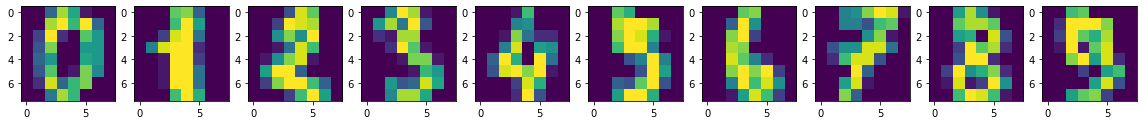

In [46]:
# Set global random state
np.random.seed(31415)

# Load the dataset
digits = datasets.load_digits()

# Print the relevant information
print("Labels' size: ", digits.target.shape) # One label (0, 1, 2, 3, 4, 5, 6, 7, 8 or 9) per subject
print("Features' size: ", digits.data.shape) # [no. of subject, no. of features]
print("Images' size: ", digits.images.shape) # [no. of subject, width, height]

# Display samples of images
fig = plt.figure(figsize=(20,10))

for i in range(10):
    a = fig.add_subplot(1, 10, i+1)
    imgplot = plt.imshow(digits.images[i])


Before starting with the machine learning, you want to correctly split your data. You need to obtain a training set of 80% of your original data and the rest for a testing set. You're goint to use <b>X</b> to save your features and <b>Y</b> for the labels.

As you already saw in the previous images plots, your dataset comes in order (zero first, then a one, etc), therefore you need to shuffle your data before using it to train the ML method so that this does not influence the result. The shuffling should be among subjects, but you need to keep the features corresponding to a specific subject matching the label of the subject, therefore the shuffling shoud be made only by row (remember from your previous prints that the subjects are stored by row)

In [47]:
# Identify the number of samples and determine a treshold to split
length_data = len(digits.data)
split_data = round(length_data*0.8)

# Split in training and testing sets
X_train = digits.data[:split_data, :]
X_test = digits.data[split_data:, :]
Y_train = digits.target[:split_data]
Y_test = digits.target[split_data:]

print("\033[1m" + "Data size" + "\033[0m")
print("x train: ", X_train.shape)
print("y train: ", Y_train.shape)
print("x test: ", X_test.shape)
print("y test: ", Y_test.shape)
print("\n")

# Concatenate features and labels to shuffle accordingly
train = np.c_[X_train, Y_train]
test = np.c_[X_test, Y_test]

print("\033[1m" + "Feature + label size" + "\033[0m")
print("train: ", train.shape)
print("test: ", test.shape)
print("\n")

print("\033[1m" + "Examples before shuffling" + "\033[0m")
print("train:\n", train[:5,55:])
print("test:\n", test[:5,55:])
print("\n")

# Shuffle the data
np.random.shuffle(train)
np.random.shuffle(test)

print("\033[1m" + "Examples after shuffling" + "\033[0m")
print("shuffled train:\n", train[:5,55:])
print("shuffled test:\n", test[:5,55:])

# Separate features and labels
X_train = train[:,:-1]
Y_train = train[:,-1]
X_test = test[:,:-1]
Y_test = test[:,-1]

Data size
x train:  (1438, 64)
y train:  (1438,)
x test:  (359, 64)
y test:  (359,)


Feature + label size
train:  (1438, 65)
test:  (359, 65)


Examples before shuffling
train:
 [[ 0.  0.  0.  6. 13. 10.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 11. 16. 10.  0.  0.  1.]
 [ 0.  0.  0.  0.  3. 11. 16.  9.  0.  2.]
 [ 0.  0.  0.  7. 13. 13.  9.  0.  0.  3.]
 [ 0.  0.  0.  0.  2. 16.  4.  0.  0.  4.]]
test:
 [[ 0.  0.  2. 12. 16. 13.  6.  0.  0.  3.]
 [ 0.  0.  0.  0. 12.  9.  0.  0.  0.  4.]
 [ 0.  0.  0.  5. 16. 16. 14.  1.  0.  5.]
 [ 0.  0.  0.  5. 13. 16. 12.  1.  0.  6.]
 [ 0.  0.  0.  3. 16.  2.  0.  0.  0.  7.]]


Examples after shuffling
shuffled train:
 [[ 0.  0.  0. 10. 15. 12.  3.  0.  0.  3.]
 [ 0.  0.  0.  3. 15. 16. 10.  1.  0.  6.]
 [ 0.  0.  0.  0. 10. 16. 12.  0.  0.  8.]
 [ 0.  0.  0.  0.  3. 15. 13.  0.  0.  1.]
 [ 0.  0.  0. 10. 16. 13.  3.  0.  0.  2.]]
shuffled test:
 [[ 0.  0.  0.  7. 16. 16. 15.  0.  0.  0.]
 [ 0.  0.  0.  4. 15. 15. 12.  3.  0.  6.]
 [ 0.  0.  2. 13. 12

Now you are ready to start the training and testing. Remember that the training is made with the features (<b>X</b>) and labels (<b>Y</b>) corresponding to the training set, while the testing only requires the features (<b>X</b>) corresponding to the testing set, you do not provide the labels (<b>Y</b>) in this case as you don't want to give the correct answer to the method, it should guess!!.

In [48]:
# Define the ML method to use
method = KNeighborsClassifier(n_neighbors=3)
#method = GaussianNB()
#method = DecisionTreeClassifier(random_state=0)
#method = LinearDiscriminantAnalysis()

method.fit(X_train, Y_train) # Train the method
pred = method.predict(X_test) # Generate the predictions

Until now you have your method trained and you made predictions using data that the method did not see before (the testing set). Now is time to test how good were your predictions. You stored your predictions in the variable <b>pred</b>, now let's compare with the actual results (<b>Y_test</b>) using some metrics.

The confusion matrix you will display corresponds only to the label <b>0</b>. Plot by yourself the confusion matrices corresponding to the rest of the labels (this does not apply if you are using jupyter try, as it is not available, if this is the case replace the <b>ConfusionMatrixDisplay</b> command with a simple <b>print(cm)</b>, it is not visually pleasing but serves the purpose).

<b>Hint:</b> The variable <b>cm</b> saves all the confusion matrices you need, you can access to each of them by indexing (<b>cm[index]</b>)

The accuracy is:  96.66 %


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (10).

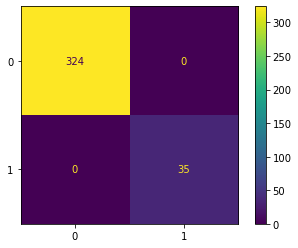

In [49]:
acc = accuracy_score(Y_test, pred) # accuracy
cm = multilabel_confusion_matrix(Y_test, # confusion matrix per label
                            pred,
                            labels=[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])


print("The accuracy is: ", round(acc*100, 2), "%")

disp = ConfusionMatrixDisplay(confusion_matrix=cm[0],
                                 display_labels=[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
disp.plot()
# tree.plot_tree(method)

You have a complete program that trains a ML method, makes predictions and evaluates them. Now you should try with different ML methods. The following methods are the ones expected:

<b>Naive Bayes</b>:

You can import it using <i>from sklearn.naive_bayes import GaussianNB</i> in the first cell

You define the method using <i>GaussianNB()</i>
    

<b>CART</b>:

Import with <i>from sklearn.tree import DecisionTreeClassifier</i>

Define with <i>DecisionTreeClassifier(random_state=0)</i>

In this case, after fitting the method (the training part) use <i>tree.plot_tree(method)</i> to visualize the tree.
    

<b>LDA</b>:

Import with <i>from sklearn.discriminant_analysis import LinearDiscriminantAnalysis</i>

Define with <i>LinearDiscriminantAnalysis()</i>

When you finish use an extra markdown cell at the end to explain which method you think that provided the best result.

Si se comparan los 4 métodos usados, el del ejemplo y los otros 3 mencionados(Naive Bayes, CART, LDA) el mejor entre todos es el del ejemplo. Esto es posible conocerlo debido a la precisión que muestra la matriz de confusión. En el caso del método "KNeighbors" sus valores están la mayoría considerados como verdaderos positivos y verdaderos negativos y no se coloca ninguno como falsos resultados. Este tiene una precisión de 96.66%. Si se comparan ahora los otros 3 métodos restantes el mejor sería el de "LDA", esto es debido a que su precisión es de 89.97%, mientras que para Naive es 81.34% y por último CART con 78.27%. En "Naive" solo se tienen 2 valores en la matriz de confusión como falsos resultados, solo un falso positivo y otro falso negativo